In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [39]:
ds_hmeq = pd.read_csv('./Downloads/week4day1/HMEQ.csv',engine='python')
ds_hmeq.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [40]:
ds_hmeq["JOB"].fillna("Other",inplace=True)
ds_hmeq.fillna(ds_hmeq.mean(),inplace=True)

In [41]:
ds_hmeq_dummy=pd.get_dummies(ds_hmeq)
ds_hmeq_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [42]:
np.random.seed(seed=1234)
msk=np.random.rand(ds_hmeq.shape[0]) <0.7
ds_hmeq_train=ds_hmeq_dummy[msk]
ds_hmeq_test=ds_hmeq_dummy[~msk]

ds_hmeq_train_y=ds_hmeq_train["BAD"]
ds_hmeq_train_x=ds_hmeq_train.drop("BAD", axis=1, inplace=False)
ds_hmeq_test_y=ds_hmeq_test["BAD"]
ds_hmeq_test_x=ds_hmeq_test.drop("BAD", axis=1, inplace=False)

print("train data X size : {}".format(ds_hmeq_train_x.shape))
print("train data Y size : {}".format(ds_hmeq_train_y.shape))
print("test data X size : {}".format(ds_hmeq_test_x.shape))
print("test data Y size : {}".format(ds_hmeq_test_y.shape))

train data X size : (2604, 18)
train data Y size : (2604,)
test data X size : (1144, 18)
test data Y size : (1144,)


In [43]:
ds_hmeq_train_x_scaled=scale(ds_hmeq_train_x, axis=0)
ds_hmeq_test_x_scaled=scale(ds_hmeq_test_x, axis=0)
pd.DataFrame(ds_hmeq_train_x_scaled, columns=ds_hmeq_train_x.columns).head()

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  


,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.546445,-0.994709,-1.227453,-0.020546,-0.26517,-0.337599,-0.962571,-0.019984,-1.424138,0.372555,-1.566391,1.566391,-0.374973,-0.446595,1.217524,-0.587402,-0.135576,-0.184808
1,-1.537818,-1.040082,-1.177823,0.250021,-0.26517,-0.337599,-1.117329,-0.663021,-1.424138,0.344145,-1.566391,1.566391,-0.374973,-0.446595,1.217524,-0.587402,-0.135576,-0.184808
2,-1.494683,0.598052,0.247041,-0.967531,-0.26517,-0.337599,-1.090197,-0.663021,-0.898712,-0.313747,-1.566391,1.566391,-0.374973,2.239164,-0.821339,-0.587402,-0.135576,-0.184808
3,-1.442920,0.633069,0.092557,-1.102815,-0.26517,-0.337599,-1.027931,-0.663021,-0.898712,-0.504711,-1.566391,1.566391,-0.374973,2.239164,-0.821339,-0.587402,-0.135576,-0.184808
4,-1.442920,0.642472,0.242451,-0.967531,-0.26517,-0.337599,-0.961666,-0.663021,-0.898712,-0.521514,-1.566391,1.566391,-0.374973,2.239164,-0.821339,-0.587402,-0.135576,-0.184808


In [44]:
model=["DecisionTree", "RandomForest", "GradientBoosting", "SVM"]
train_accuracy=[]
test_accuracy=[]
model_f1_score=[]

# Decision Tree

In [45]:
tree = DecisionTreeClassifier(criterion="gini", max_depth=10, min_samples_leaf=30,random_state=1234)
tree.fit(ds_hmeq_train_x_scaled, ds_hmeq_train_y)
train_accuracy.append(tree.score(ds_hmeq_train_x_scaled, ds_hmeq_train_y))
test_accuracy.append(tree.score(ds_hmeq_test_x_scaled, ds_hmeq_test_y))
model_f1_score.append(f1_score(ds_hmeq_test_y,tree.predict(ds_hmeq_test_x_scaled)))

# Random Forest

In [46]:
rf = RandomForestClassifier(criterion="gini", n_estimators=500, max_depth=4, min_samples_leaf=30, random_state=1234)
rf.fit(ds_hmeq_train_x_scaled, ds_hmeq_train_y)
train_accuracy.append(rf.score(ds_hmeq_train_x_scaled, ds_hmeq_train_y))
test_accuracy.append(rf.score(ds_hmeq_test_x_scaled, ds_hmeq_test_y))
model_f1_score.append(f1_score(ds_hmeq_test_y,rf.predict(ds_hmeq_test_x_scaled)))

# Gradient Boosting

In [47]:
gb = GradientBoostingClassifier(learning_rate=0.1, max_depth=4, min_samples_leaf=30, n_estimators=5, random_state=1234)
gb.fit(ds_hmeq_train_x_scaled, ds_hmeq_train_y)
train_accuracy.append(gb.score(ds_hmeq_train_x_scaled, ds_hmeq_train_y))
test_accuracy.append(gb.score(ds_hmeq_test_x_scaled, ds_hmeq_test_y))
model_f1_score.append(f1_score(ds_hmeq_test_y,gb.predict(ds_hmeq_test_x_scaled)))

# SVM

In [48]:
svm = SVC(C=6, gamma=0.1, random_state=1234)
svm.fit(ds_hmeq_train_x_scaled, ds_hmeq_train_y)
train_accuracy.append(svm.score(ds_hmeq_train_x_scaled, ds_hmeq_train_y))
test_accuracy.append(svm.score(ds_hmeq_test_x_scaled, ds_hmeq_test_y))
model_f1_score.append(f1_score(ds_hmeq_test_y,svm.predict(ds_hmeq_test_x_scaled)))

In [49]:
ds_eval=pd.DataFrame(index=model)
ds_eval["TrainAccuracy"]=train_accuracy
ds_eval["TestAccuracy"]=test_accuracy
ds_eval["F1Score"]=model_f1_score
ds_eval.round(3)

,TrainAccuracy,TestAccuracy,F1Score
DecisionTree,0.929,0.927,0.420
RandomForest,0.925,0.926,0.298
GradientBoosting,0.922,0.922,0.239
SVM,0.981,0.957,0.692


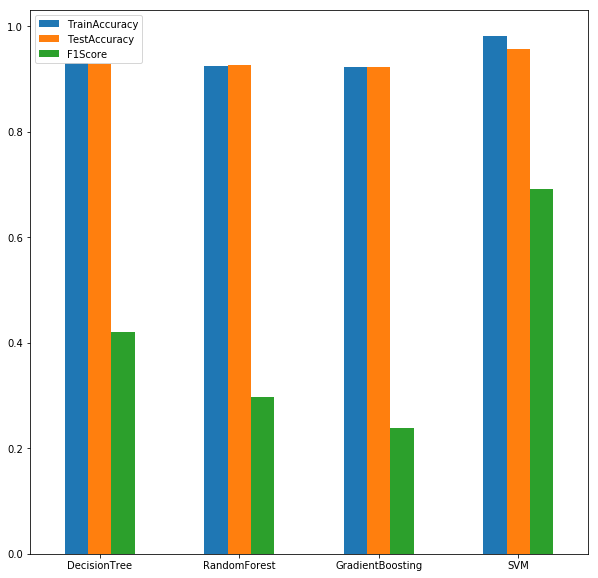

In [54]:
ds_eval.plot.bar(figsize=(10,10),rot=0)